### Importing important libraries

In [1]:
# importing required libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Modeling Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#traning and scoring libarries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
# Plotting libarries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

In [4]:
# Performance meauring libarry
import time

Loading the data form the csv kept in data folder, using different seperator ';' to separate columns as it has been used in the provided dataset.

In [5]:
df = pd.read_csv('data/bank.csv',sep = ';')

In [6]:
# bank dataframe
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Looking at the data through different ways to undertand it better

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [11]:
df.shape

(4521, 17)

Data Preprocessing

In [12]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

We dont have any null data to drop from the dataframe

Seperating numeric and non numeric column list for further use

In [13]:
cat_list=[]
num_list=[]

for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values<13:
        cat_list.append(column_name)
    else:
        num_list.append(column_name)

In [14]:
cat_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [15]:
num_list

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

### Data Preprocessing

Checking for outliers by plotting data

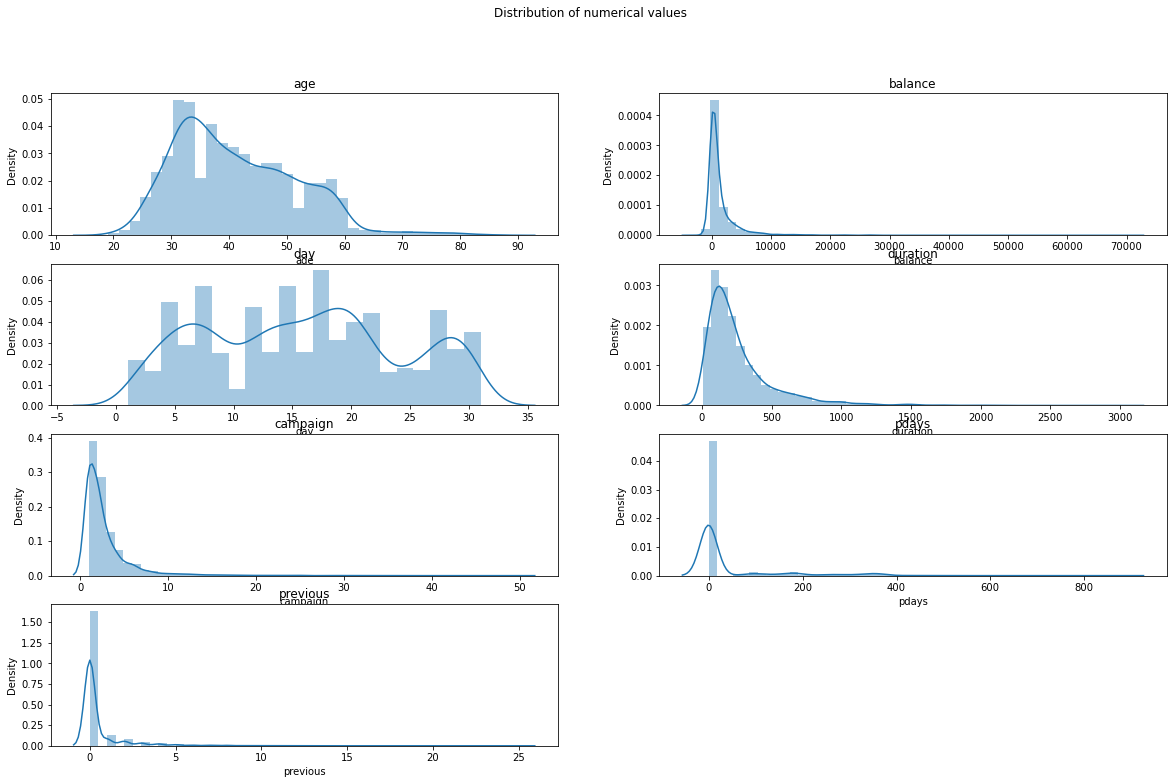

In [16]:
k=1
plt.figure(figsize=(20,12))
plt.suptitle("Distribution of numerical values")

for i in df.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1

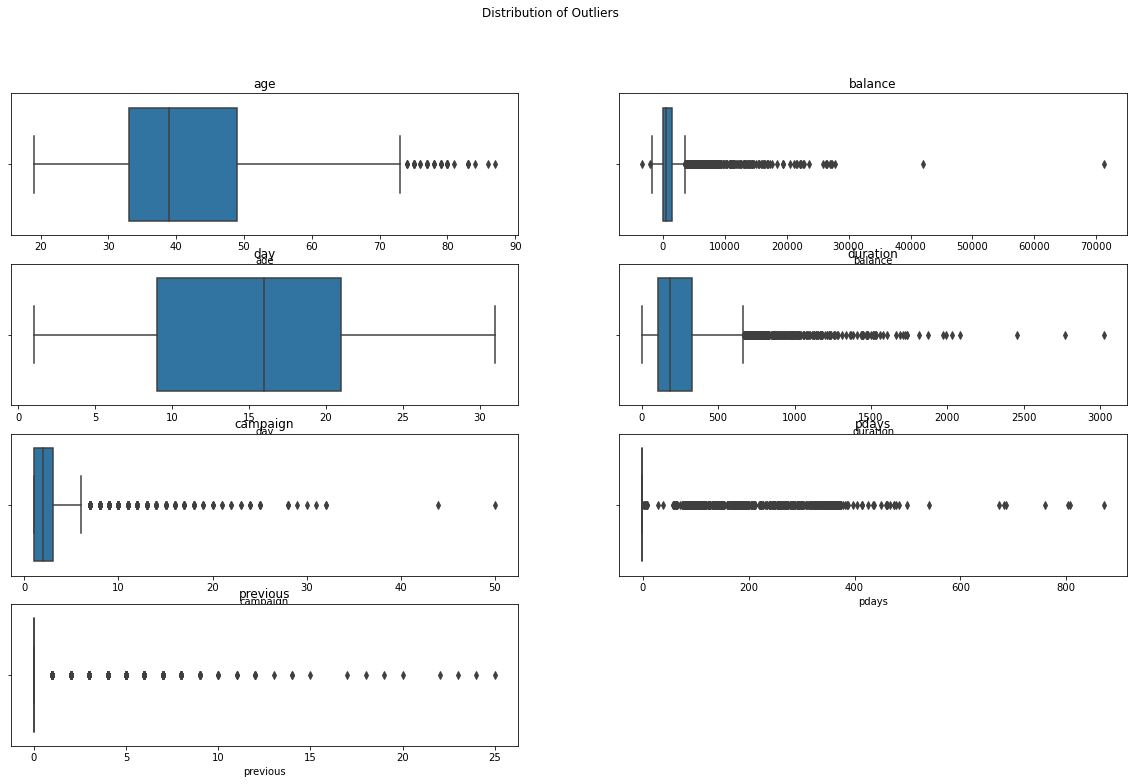

In [17]:
k=1
plt.figure(figsize=(20,12))
plt.suptitle("Distribution of Outliers")

for i in df.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.boxplot(x = i, data = df.loc[:,num_list])
    plt.title(i)
    k+=1

let's remove outliers for age and duration, other variables don't make much sense

In [19]:
out_list=["age","duration"]
for i in df.loc[:,out_list]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df.loc[df[i] > up_lim,i] = up_lim
    df.loc[df[i] < low_lim,i] = low_lim

Understanding Categorical features

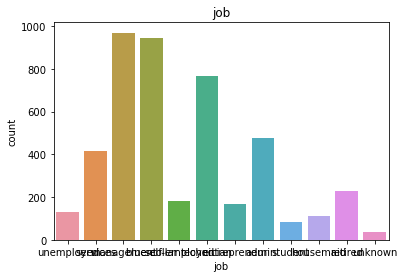

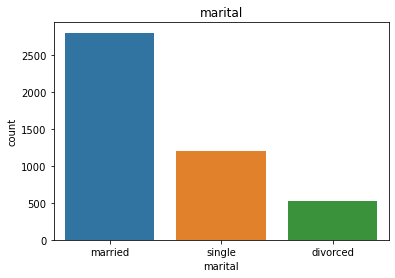

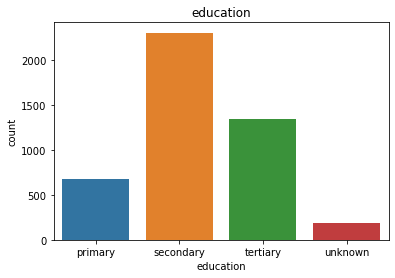

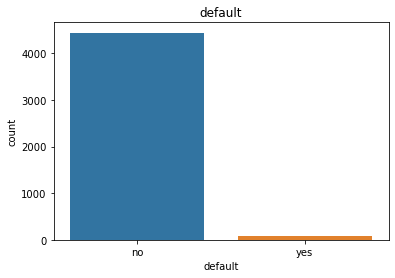

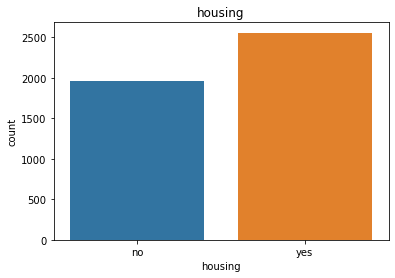

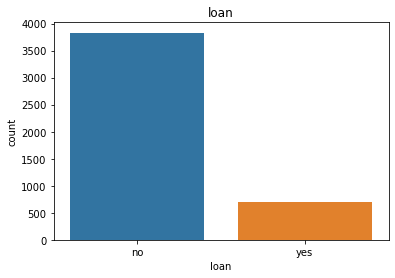

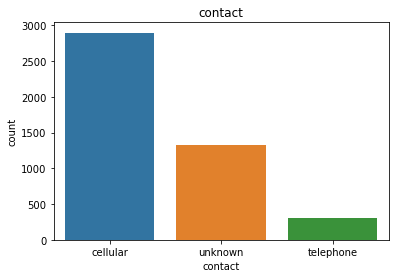

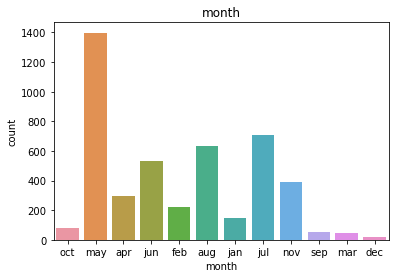

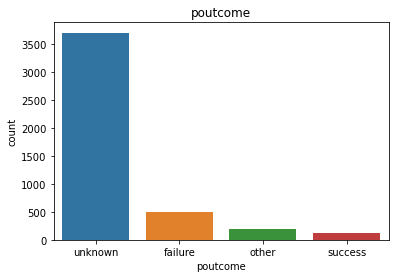

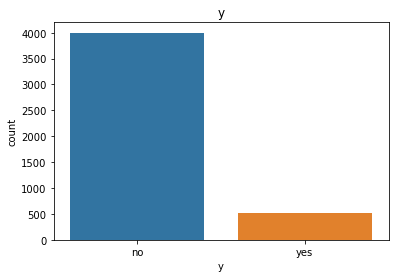

In [20]:
for i in cat_list:
    plt.figure()
    sns.countplot(x = i, data = df.loc[:,cat_list])
    plt.title(i)

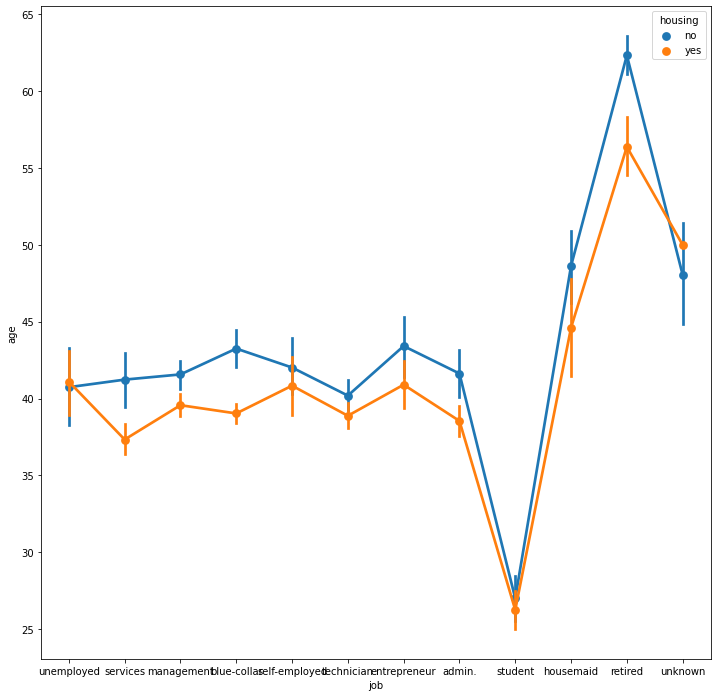

In [21]:
plt.figure(figsize=(12,12))

sns.pointplot(x ='job',y ='age', data = df,hue="housing");

Transforming categorical data for model fitting

In [23]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [24]:
df_new = df.apply(lambda x: object_to_int(x))
df_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79.0,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220.0,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185.0,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199.0,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226.0,1,-1,0,3,0


Checking for correlations

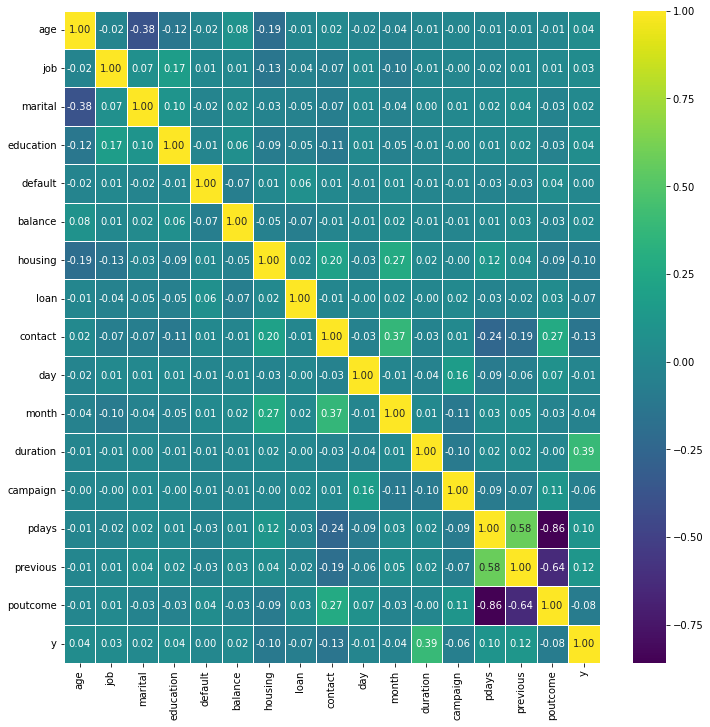

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(df_new.corr(),annot=True,linewidths=0.6,fmt=".2f",cmap="viridis")
plt.show()

### Distributing data into Features and results set and then splitting it to testing and training sets

In [26]:
X = df_new.drop(columns = ['y'])
y = df_new['y'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [28]:
scaler= StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Fitting different models and comparing their performances

### KNN

In [29]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
t0 = time.time()
knn_model.fit(X_train,y_train)
knn_time = time.time()-t0
print("Training time KNN:", knn_time)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)
print(classification_report(y_test, predicted_y))

Training time KNN: 0.0021157264709472656
KNN accuracy: 0.8835666912306559
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1201
           1       0.46      0.08      0.14       156

    accuracy                           0.88      1357
   macro avg       0.68      0.54      0.54      1357
weighted avg       0.84      0.88      0.85      1357



### SVM

In [30]:
svc_model = SVC(random_state = 1)

t0 = time.time()
svc_model.fit(X_train,y_train)
svm_time = time.time()- t0
print("Training time SVM:", svm_time)

predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)
print(classification_report(y_test, predict_y))

Training time SVM: 0.13808298110961914
SVM accuracy is : 0.8909358879882093
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1201
           1       0.65      0.11      0.19       156

    accuracy                           0.89      1357
   macro avg       0.77      0.55      0.56      1357
weighted avg       0.87      0.89      0.85      1357



### Logistic Regression

In [31]:
lr_model = LogisticRegression()
t0 = time.time()
lr_model.fit(X_train,y_train)
LR_time =  time.time()-t0
print("Training time Logistic Regression:", LR_time)

accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

Training time Logistic Regression: 0.00987386703491211
Logistic Regression accuracy is : 0.8820928518791452
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1201
           1       0.46      0.13      0.21       156

    accuracy                           0.88      1357
   macro avg       0.68      0.56      0.57      1357
weighted avg       0.85      0.88      0.85      1357



### Decision tree

In [32]:
dt_model = DecisionTreeClassifier()
t0 = time.time()
dt_model.fit(X_train,y_train)
DT_time = time.time()-t0
print("Training time Decision tree:", DT_time)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)
print(classification_report(y_test, predictdt_y))

Training time Decision tree: 0.013813972473144531
Decision Tree accuracy is : 0.866617538688283
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1201
           1       0.42      0.40      0.41       156

    accuracy                           0.87      1357
   macro avg       0.67      0.67      0.67      1357
weighted avg       0.86      0.87      0.87      1357



In [33]:
data = {"SMV_accuracy": [accuracy_svc], "LogisticReg_accuracy": [accuracy_lr], "DecisiionTr_accuracy": [accuracy_dt], "KNN_accuracy": [accuracy_knn]}
resultsdf = pd.DataFrame.from_dict(data)
resultsdf

,SMV_accuracy,LogisticReg_accuracy,DecisiionTr_accuracy,KNN_accuracy
0,0.890936,0.882093,0.866618,0.883567


Text(0, 0.5, 'Accuracy')

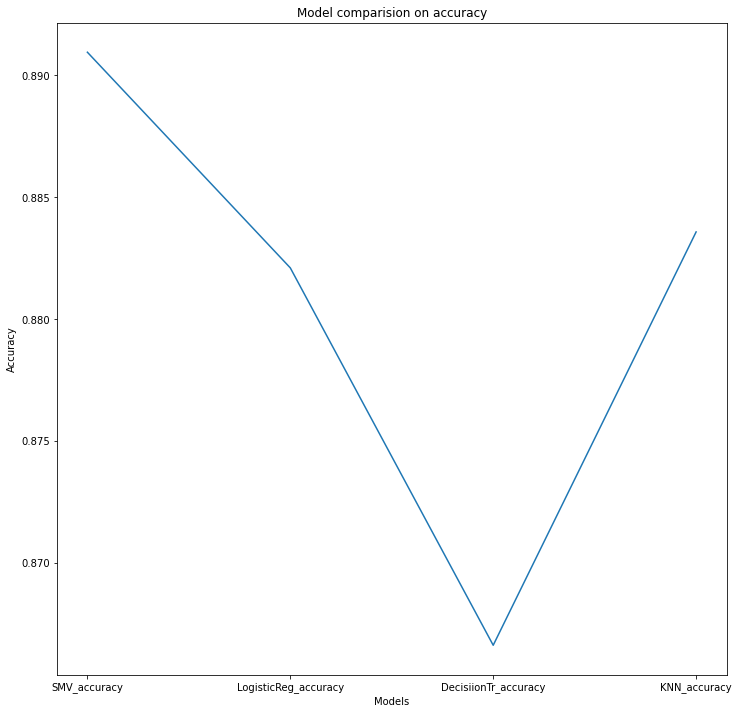

In [34]:
plt.figure(figsize=(12,12))
plt.plot(resultsdf.T)
plt.title("Model comparision on accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")

In [35]:
data = {"SMV_train_time": [svm_time], "LogisticReg_train_time": [LR_time], "DecisiionTr__train_time": [DT_time], "KNN_train_time": [knn_time]}
resultsdf = pd.DataFrame.from_dict(data)
resultsdf

,SMV_train_time,LogisticReg_train_time,DecisiionTr__train_time,KNN_train_time
0,0.138083,0.009874,0.013814,0.002116


Text(0, 0.5, 'Training Time')

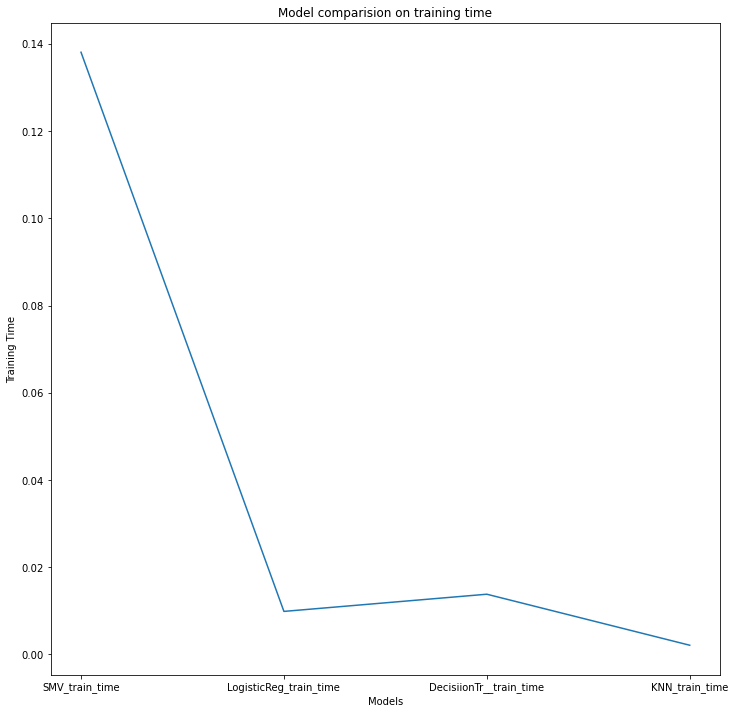

In [36]:
plt.figure(figsize=(12,12))
plt.plot(resultsdf.T)
plt.title("Model comparision on training time")
plt.xlabel("Models")
plt.ylabel("Training Time")

## Conclusion:

Comparing different models we can see that SVM gives a good accuracy over others but also the traning time taken in the most out of 4 models.
On other hand KNN model takes the lowest time to train the model but the accuracy is low.